In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

Consider the next query: 
`SELECT SUM(B) FROM my_table WHERE A < X`

With late materialization, we only need to load the blocks of column B where at least one tuple passes the predicate. Let us build a small model that takes *block size, data distribution* and *predicate* as parameters to evaluate the expected number of blocks of column B that need to be loaded from the disk.

Let *p* be the probability of one tuple to pass the predicate. Then $(1 - p)^{block\_size}$ is the probability of all the tuples in the block not to pass the predicate. Thus, the probability of one particular block to be loaded is $1 - (1 - p)^{block\_size}$. And this number is also the expected part of blocks that need to be loaded.

We will check next distributions: uniform, normal, Cauchy, Poisson, geometric, exponential, binomial.

In [14]:
def expected_part_of_loaded_block(block_size, distrib, predicate, N=100000, discrete=False):
    r = distrib.rvs(size=N)
    p = np.mean(predicate(r))
    plt.hist(r, density=True, alpha=0.4, bins=40)
    start = distrib.ppf(0.005)
    stop = distrib.ppf(0.995)

    if discrete:
        grid = np.arange(start=start, stop=stop+1, step=1)
        plt.plot(grid, distrib.pmf(grid))
    else:
        grid = np.linspace(start=start, stop=stop, num=201)
        plt.plot(grid, distrib.pdf(grid))
    plt.xlim(start - 0.2, stop + 0.2)
    print('probability to pass the predicate: {}'.format(p))
    print('part of blocks to be loaded: {}'.format(1 - (1 - p)**block_size))
    return 1 - (1 - p)**block_size

## Unoform distribution

probability to pass the predicate: 0.05063
part of blocks to be loaded: 0.4052218039520319


0.4052218039520319

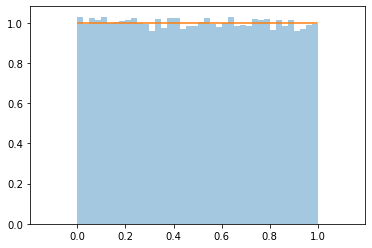

In [15]:
uniform_distrib = sps.uniform
predicate = lambda x: x < 0.05
expected_part_of_loaded_block(10, uniform_distrib, predicate)

## Normal distribution

probability to pass the predicate: 0.1585
part of blocks to be loaded: 0.8219503176862148


0.8219503176862148

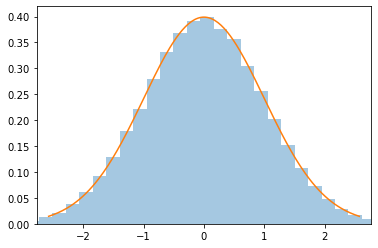

In [16]:
norm_distrib = sps.norm(loc=0, scale=1)
predicate = lambda x: x > 1
expected_part_of_loaded_block(10, norm_distrib, predicate)

probability to pass the predicate: 0.30797
part of blocks to be loaded: 0.9748087789711176


0.9748087789711176

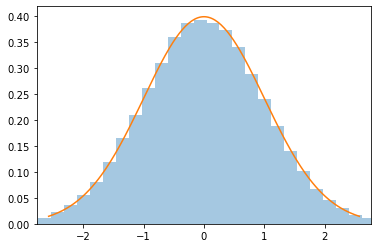

In [17]:
norm_distrib = sps.norm(loc=0, scale=1)
predicate = lambda x: x > 0.5
expected_part_of_loaded_block(10, norm_distrib, predicate)

## Cauchy distribution

probability to pass the predicate: 0.03015
part of blocks to be loaded: 0.26371542648004676


0.26371542648004676

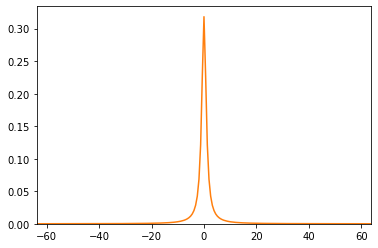

In [18]:
cauchy_distrib = sps.cauchy(loc=0, scale=1)
predicate = lambda x: x > 10
expected_part_of_loaded_block(10, cauchy_distrib, predicate)

probability to pass the predicate: 0.06382
part of blocks to be loaded: 0.4828773160990989


0.4828773160990989

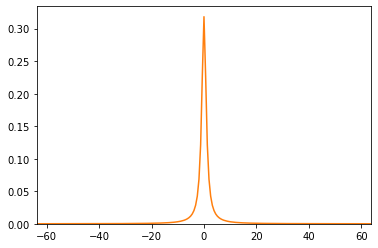

In [19]:
cauchy_distrib = sps.cauchy(loc=0, scale=1)
predicate = lambda x: x > 5
expected_part_of_loaded_block(10, cauchy_distrib, predicate)

probability to pass the predicate: 0.14766
part of blocks to be loaded: 0.7976381216205904


0.7976381216205904

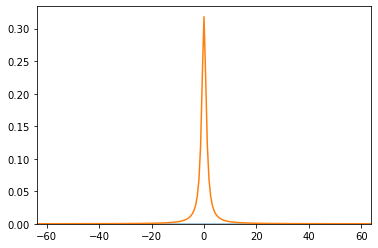

In [20]:
cauchy_distrib = sps.cauchy(loc=0, scale=1)
predicate = lambda x: x > 2
expected_part_of_loaded_block(10, cauchy_distrib, predicate)

## Poisson distribution

probability to pass the predicate: 0.26488
part of blocks to be loaded: 0.9539125812279121


0.9539125812279121

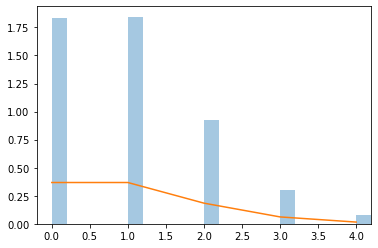

In [21]:
poisson_distrib = sps.poisson(1)
predicate = lambda x: x > 1
expected_part_of_loaded_block(10, poisson_distrib, predicate, discrete=True)

probability to pass the predicate: 0.04918
part of blocks to be loaded: 0.3960748955517027


0.3960748955517027

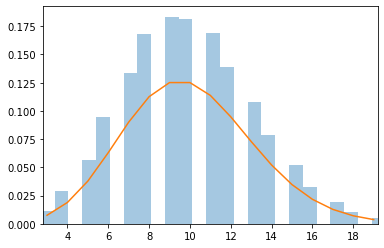

In [22]:
poisson_distrib = sps.poisson(10)
predicate = lambda x: x > 15
expected_part_of_loaded_block(10, poisson_distrib, predicate, discrete=True)

## Geometric distribution

probability to pass the predicate: 0.12628
part of blocks to be loaded: 0.7407476086676632


0.7407476086676632

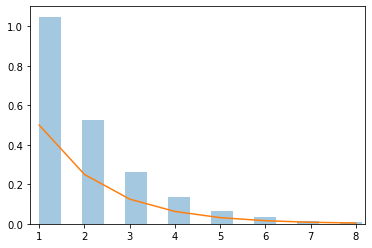

In [23]:
geom_distrib = sps.geom(0.5)
predicate = lambda x: x > 3
expected_part_of_loaded_block(10, geom_distrib, predicate, discrete=True)

probability to pass the predicate: 0.02649
part of blocks to be loaded: 0.23545303262882344


0.23545303262882344

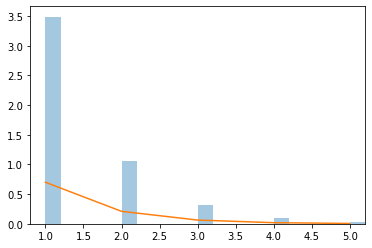

In [24]:
geom_distrib = sps.geom(0.7)
predicate = lambda x: x > 3
expected_part_of_loaded_block(10, geom_distrib, predicate, discrete=True)

probability to pass the predicate: 0.50882
part of blocks to be loaded: 0.9991826524828098


0.9991826524828098

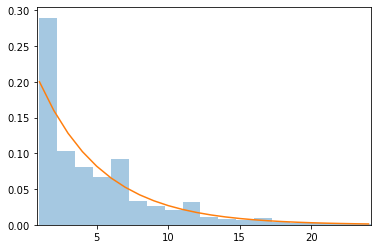

In [25]:
geom_distrib = sps.geom(0.2)
predicate = lambda x: x > 3
expected_part_of_loaded_block(10, geom_distrib, predicate, discrete=True)

## Exponential distribution

probability to pass the predicate: 0.36601
part of blocks to be loaded: 0.9895088263008257


0.9895088263008257

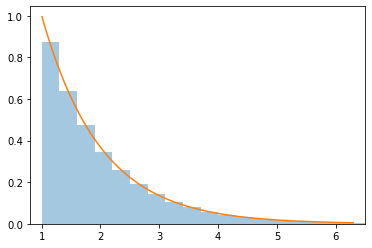

In [27]:
exp_distrib = sps.expon(1)
predicate = lambda x: x > 2
expected_part_of_loaded_block(10, exp_distrib, predicate)

probability to pass the predicate: 0.1354
part of blocks to be loaded: 0.7665723424118136


0.7665723424118136

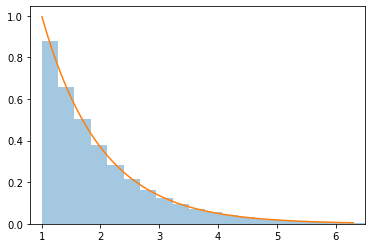

In [29]:
exp_distrib = sps.expon(1)
predicate = lambda x: x > 3
expected_part_of_loaded_block(10, exp_distrib, predicate)

probability to pass the predicate: 0.05507
part of blocks to be loaded: 0.43246013367374603


0.43246013367374603

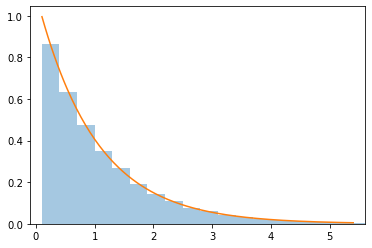

In [30]:
exp_distrib = sps.expon(0.1)
predicate = lambda x: x > 3
expected_part_of_loaded_block(10, exp_distrib, predicate)

probability to pass the predicate: 0.0488
part of blocks to be loaded: 0.3936569330731704


0.3936569330731704

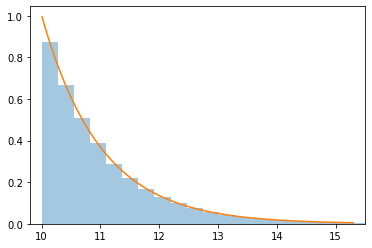

In [33]:
exp_distrib = sps.expon(10)
predicate = lambda x: x > 13
expected_part_of_loaded_block(10, exp_distrib, predicate)

## Binomial distribution

probability to pass the predicate: 0.05455
part of blocks to be loaded: 0.42932918605562853


0.42932918605562853

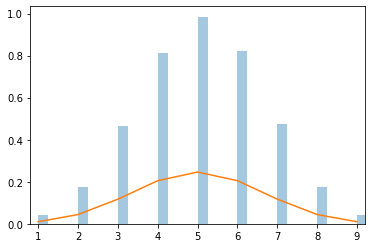

In [34]:
binom_distrib = sps.binom(n=10, p=0.5)
predicate = lambda x: x > 7
expected_part_of_loaded_block(10, binom_distrib, predicate, discrete=True)

probability to pass the predicate: 0.78841
part of blocks to be loaded: 0.9999998201330437


0.9999998201330437

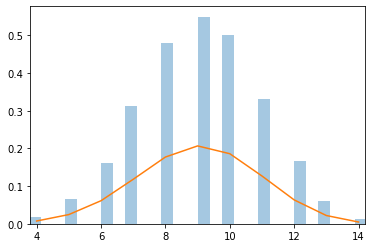

In [35]:
binom_distrib = sps.binom(n=15, p=0.6)
predicate = lambda x: x > 7
expected_part_of_loaded_block(10, binom_distrib, predicate, discrete=True)

probability to pass the predicate: 0.11618
part of blocks to be loaded: 0.7091706383467324


0.7091706383467324

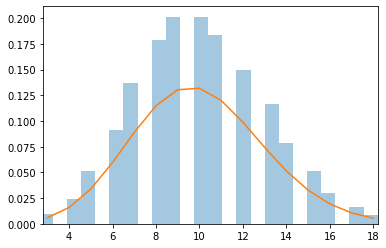

In [38]:
binom_distrib = sps.binom(n=100, p=0.1)
predicate = lambda x: x < 7
expected_part_of_loaded_block(10, binom_distrib, predicate, discrete=True)